In [0]:
X = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/training/featuresrgb.pickle", "rb"))
Y = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/training/labelsrgb.pickle", "rb"))
X1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/validation/featuresrgb.pickle", "rb"))
Y1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data2a/validation/labelsrgb.pickle", "rb"))

X=X/255
X1=X1/255
Y=np.array(Y)
Y1=np.array(Y1)

X=X.reshape(1856,224,224,3)
X1=X1.reshape(460,224,224,3)

In [0]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import numpy as np
import os,cv2
import pickle    

In [0]:
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224,224,3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
model=define_model()
model.summary()



58892288/58889256 [==============================] - 2s 0us/step
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
history=model.fit(X,Y, batch_size=20,epochs=7, validation_split=0.1)
test_loss, test_acc = model.evaluate(X1, Y1)
print('test acc= ',test_acc)
print('test loss= ',test_loss)

Train on 1670 samples, validate on 186 samples
Epoch 1/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.5335 - accuracy: 0.7317 - val_loss: 0.2808 - val_accuracy: 0.9086
Epoch 2/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.3616 - accuracy: 0.8377 - val_loss: 0.2505 - val_accuracy: 0.9140
Epoch 3/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.3136 - accuracy: 0.8569 - val_loss: 0.6161 - val_accuracy: 0.6828
Epoch 4/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.2685 - accuracy: 0.8814 - val_loss: 0.3993 - val_accuracy: 0.8226
Epoch 5/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.2556 - accuracy: 0.8970 - val_loss: 0.2406 - val_accuracy: 0.8978
Epoch 6/7
1670/1670 [==============================] - 17s 10ms/step - loss: 0.2239 - accuracy: 0.9096 - val_loss: 0.2182 - val_accuracy: 0.9086
Epoch 7/7
460/460 [==============================] - 6s 13ms/step
test acc=  0.8695

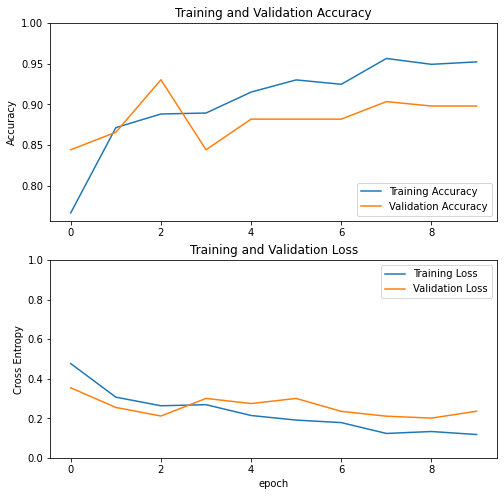

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
pickle_out=open("model2.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close() 

In [0]:
model1 = pickle.load(open("/content/model1.pickle", "rb"))

In [0]:
img_arr = cv2.imread(os.path.join('/download.jpg'))
new_arr = cv2.resize(img_arr, (224, 224))
image = np.expand_dims(new_arr, axis=0)
image=image/255

In [0]:
model.predict(image)

array([[0.5407967]], dtype=float32)